In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
x1 = np.random.random((100,2)) * [2,-2]
x2 = np.random.random((100,2)) * [-2,2]

In [9]:
X = np.concatenate((x1,x2))

In [10]:
X.shape

(200, 2)

In [19]:
y = np.zeros(200)
y[100:] = 1.0

In [107]:
y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

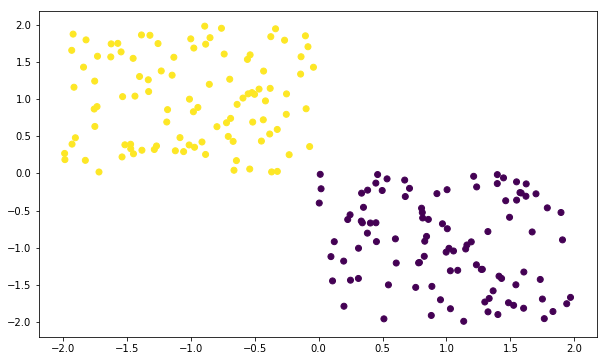

In [21]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y)

In [96]:
def svm(epochs,eta,X,y):
    errors = []
    w = np.zeros(2)
    for epoch in range(1,epochs):
        error = 0
        for i in range(len(X)):
            if (y[i] * np.dot(X[i],w)) < 1:
                # Missclassification
                w = w + eta * ((y[i] * X[i]) + (-2 * (1/epoch) * w))
                error = 1
            else:
                w = w + eta * (-2 * (1/epoch) * w)
        errors.append(error)
    return errors, w

In [102]:
err,w = svm(100000,1,X,y)

In [103]:
w

array([-2.952309  ,  2.46257772])

In [104]:
err[:10]

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [105]:
err[-10:]

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

(-0.5, 1.5)

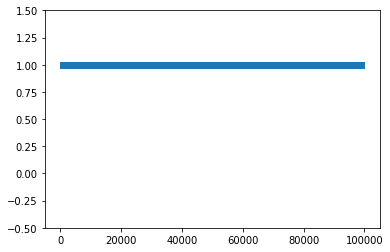

In [106]:
plt.plot(err,'|')
plt.ylim(-0.5,1.5)

In [64]:
from sklearn.svm import SVC

In [68]:
svm = SVC(kernel='linear')

In [69]:
svm.fit(X,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [70]:
svm.coef_

array([[-1.7674275 ,  1.39790712]])